# Fitting GMM using binned data
This notebook presents the use of binned data to fit Gaussian Mixture Models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, randint
from scipy.special import factorial

from gmm_binned_data import GMM, BinnedArray

%load_ext lab_black

First we define GMM parameters: weights, means, covariances and number of components. We then sample data from this distribution.

In [2]:
weights = np.array([0.2, 0.5, 0.3])
means = np.array([-5, 0, 4])
covariances = np.array([0.5, 1, 2])
n_comp = 3

gmm = GMM(n_components=n_comp, means=means, covariances=covariances, weights=weights)

n = 10000
x, y = gmm.sample(n)

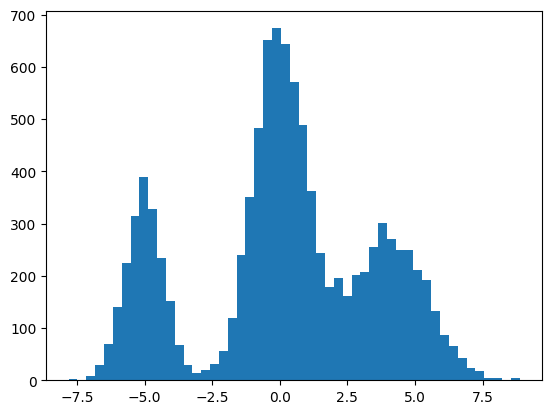

In [3]:
hist = plt.hist(x, bins=51)

We use the resulting histogram of data as the binned data to fit a new GMM. The fit will occur several times (10) and we choose the best model according to the maximum likelihood at the end of the training (100 iterations)

In [4]:
gmm_binned = GMM(n_components=n_comp, max_iter=100, max_tries=10)
gmm_binned.fit(BinnedArray(hist[0], hist[1]), from_binned_data=True)

c:\Users\maxime.baelde\Documents\repos\planif-caisse\gmm_binned_data.py:166: RuntimeWarning: divide by zero encountered in divide
  expectations_weights = old_weights * G_weights / Fs_diff
c:\Users\maxime.baelde\Documents\repos\planif-caisse\gmm_binned_data.py:166: RuntimeWarning: invalid value encountered in divide
  expectations_weights = old_weights * G_weights / Fs_diff
c:\Users\maxime.baelde\Documents\repos\planif-caisse\gmm_binned_data.py:172: RuntimeWarning: divide by zero encountered in divide
  expectations_means = old_weights * G_means / Fs_diff


nan, try again
nan, try again


We can display the likelihood of the model during the training: thanks to the EM algorithm, it is increasing.

Text(0, 0.5, 'Log-likelihood')

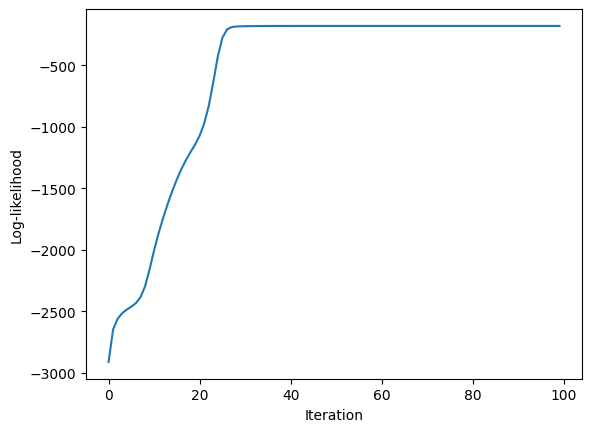

In [5]:
plt.plot(gmm_binned.likelihood_)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")

Finally, we check the fit parameters and compare them to the true parameters: up to a permutation, the results are quite satisfying.

In [6]:
gmm_binned.means, means

(array([-5.01790225e+00, -1.68353467e-04,  4.05612039e+00]),
 array([-5,  0,  4]))

In [7]:
gmm_binned.covariances, covariances

(array([0.5146679 , 0.92670429, 1.8959967 ]), array([0.5, 1. , 2. ]))

In [8]:
gmm_binned.weights, weights

(array([0.20038178, 0.50244687, 0.29717135]), array([0.2, 0.5, 0.3]))

In [9]:
y_hat = gmm_binned.predict(x)
y_hat

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)